In [5]:
import pandas as pd
import numpy as np
# from prettytable import PrettyTable
import matplotlib as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

In [6]:
target_dataset_path = "terror.csv"
terror = pd.read_csv(target_dataset_path, encoding ='ISO-8859-1')

terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country', 
                     'provstate':'City','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type'},inplace=True)

terror = terror[['Year','Month','Day','Country','City','latitude','longitude','AttackType','Killed','Wounded',
             'Target','Group','Target_type','Weapon_type']]

terror = terror[terror.Country== 'Turkey']

terror['Killed'] = terror['Killed'].fillna(0)
terror['Wounded'] = terror['Wounded'].fillna(0)

terror['Casualties'] = terror['Killed'] + terror['Wounded']
#a = terror[(terror.AttackType == 'Hijacking') & (terror.Weapon_type == 'Melee')].index
#terror.drop(a, inplace = False)

#terror.drop(terror.index[terror['AttackType'] == 'Hijacking'], inplace = False)
#terror.drop(terror.index[terror['Weapon_type'] == 'Melee'], inplace = False)

#terror.info()


C:\Users\0101\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.



In [23]:

newData = pd.DataFrame(terror.groupby(['City', 'Year']).Killed.sum())  # Groupby City and Year
#Chose five(5) cities that have highest death results. And if there is unknown cities, drop them.
cityNames = terror.groupby('City').Killed.sum().sort_values(ascending=False).drop('Unknown').head().index
newData = newData.loc[cityNames]

trace = [0] * 5
i = 0

fig =  go.Figure (go.Bar( x = newData.loc['Istanbul'].index,y = newData.loc['Istanbul'].Killed,name = "city")

                  
for city in cityNames:
    fig.add_trace(go.Figure (go.Bar( x = newData.loc[city].index,
                        y = newData.loc[city].Killed,
                        
                        name = "city",
                        ))
                       
                        #text = city
    )
    i += 1
    
data_result = trace


fig.show()

SyntaxError: invalid syntax (<ipython-input-23-e8f8ed8ec618>, line 12)

<AxesSubplot:>

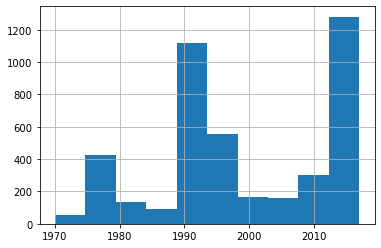

In [5]:
terror.Year.hist()

<AxesSubplot:>

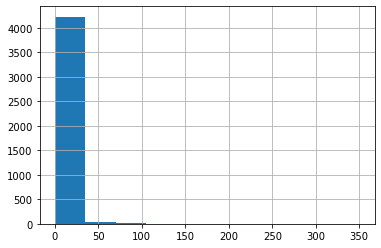

In [45]:
terror.Casualties.hist()

<AxesSubplot:>

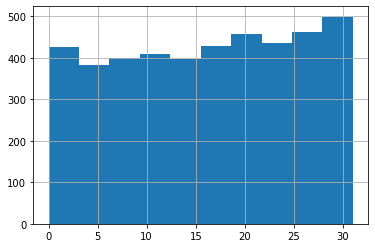

In [5]:
terror.Day.hist()

<AxesSubplot:>

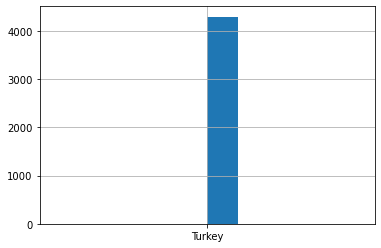

In [8]:
terror.Country.hist()

<AxesSubplot:>

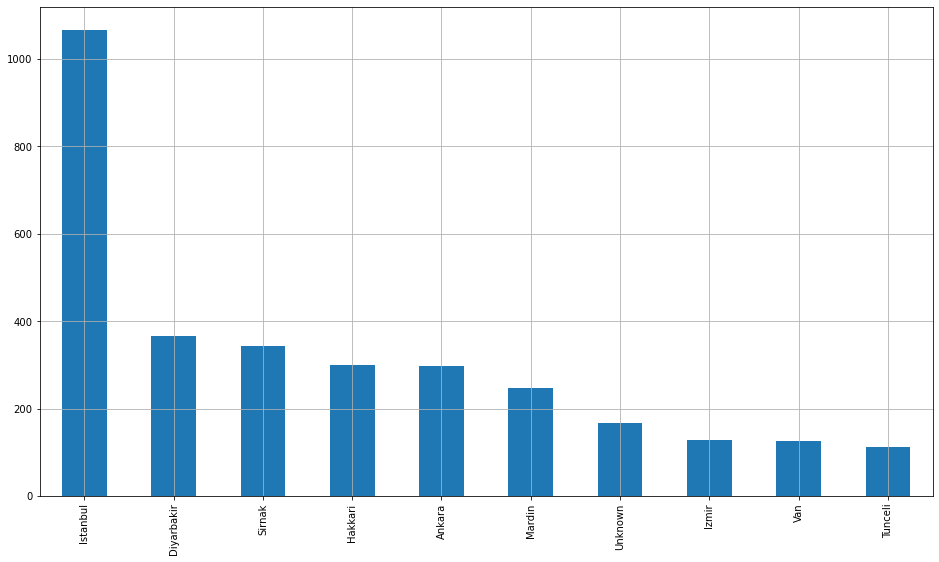

In [20]:
#terror['City'].hist(figsize = (100, 20))
terror.City.value_counts().head(10).plot.bar(figsize=[16,9], grid=True)

<AxesSubplot:>

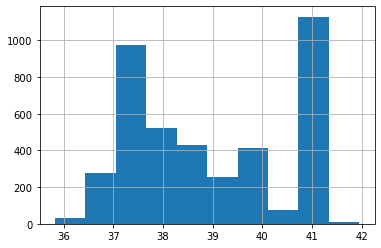

In [10]:
terror.latitude.hist()

<AxesSubplot:>

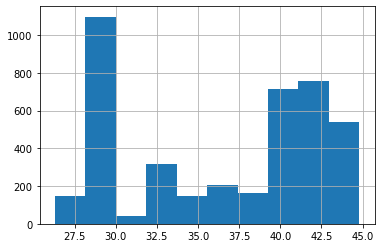

In [11]:
terror.longitude.hist()

<AxesSubplot:>

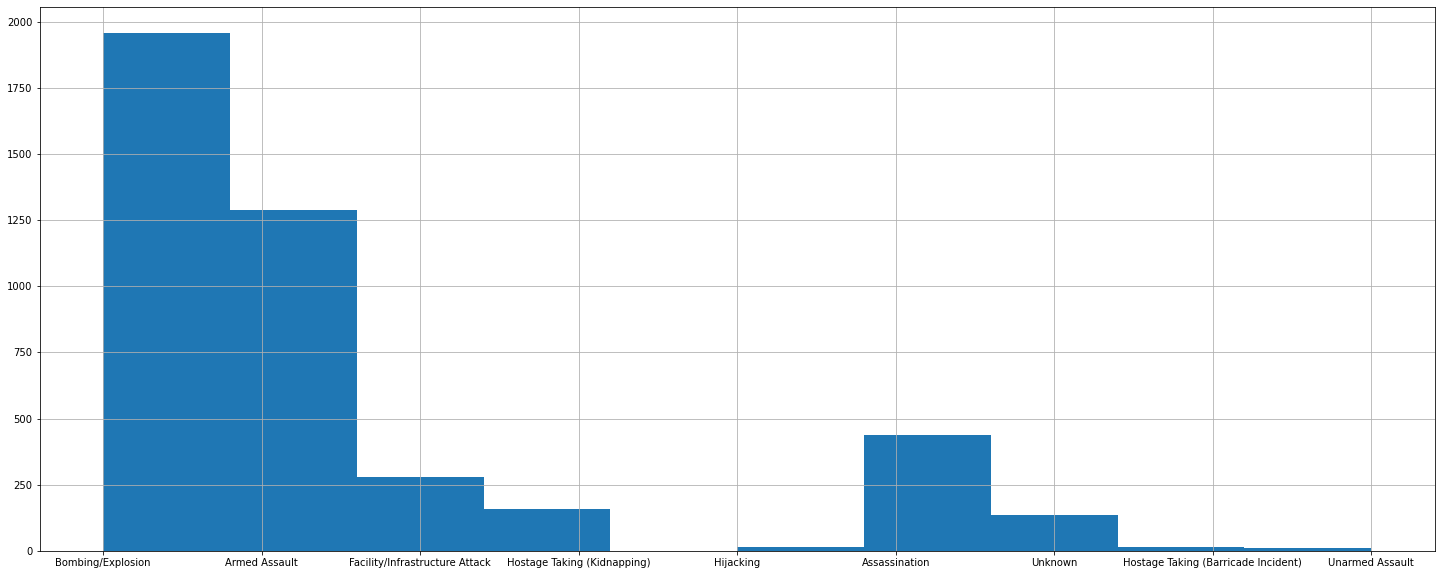

In [29]:
#terror.AttackType.hist(figsize = (20, 10))
terror.AttackType.hist(figsize = (25, 10))

<AxesSubplot:>

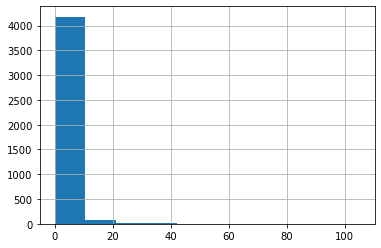

In [13]:
terror.Killed.hist()

<AxesSubplot:>

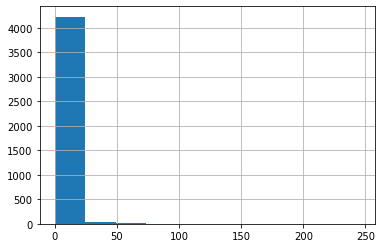

In [14]:
terror.Wounded.hist()

<AxesSubplot:>

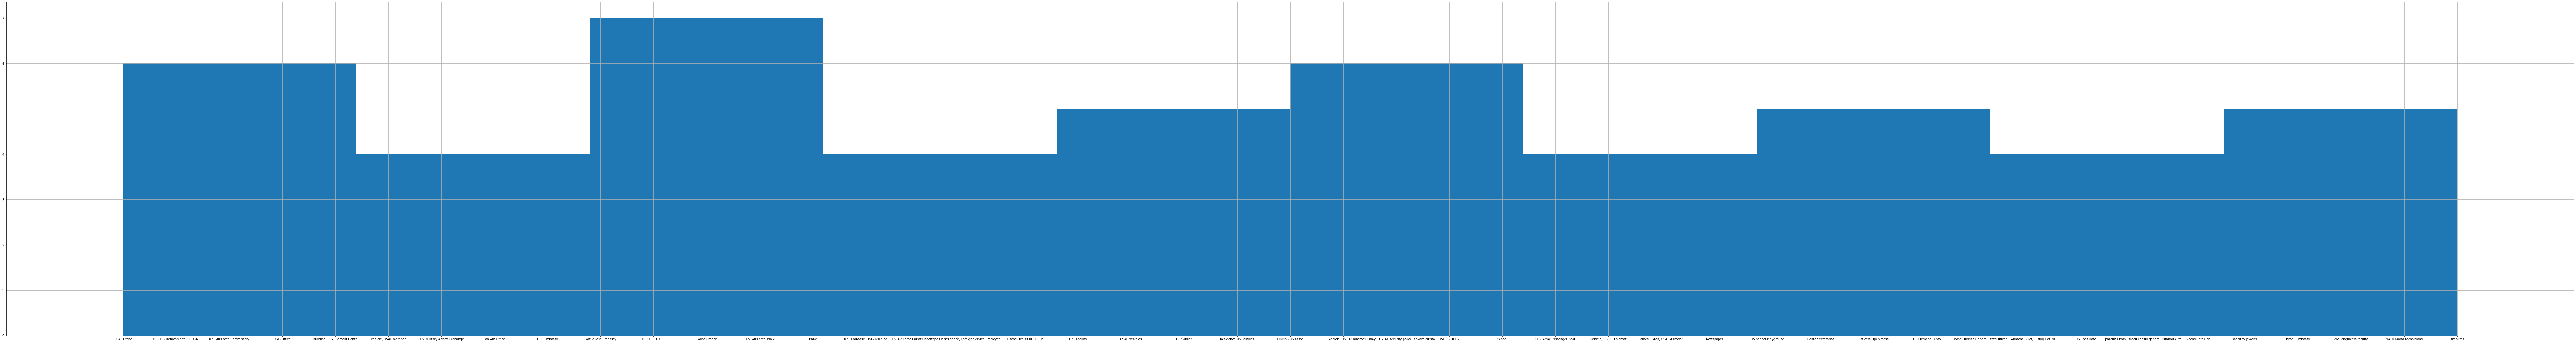

In [37]:
terror.Target.head(50).hist(figsize = (150, 20))

<AxesSubplot:>

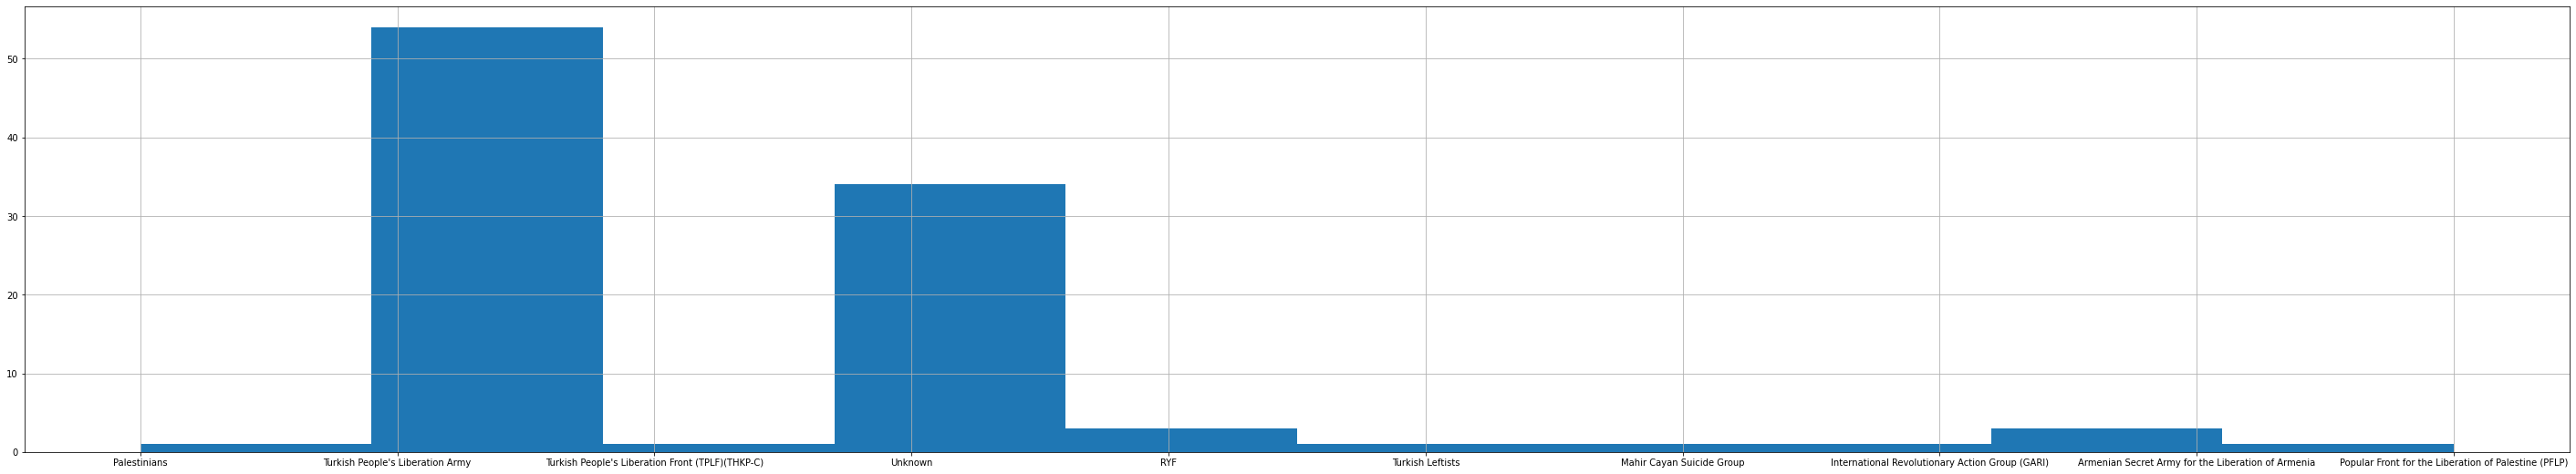

In [41]:
#terror.Group.hist(figsize = (50, 20))
terror.Group.head(100).hist(figsize=[50,9], grid=True)

<AxesSubplot:>

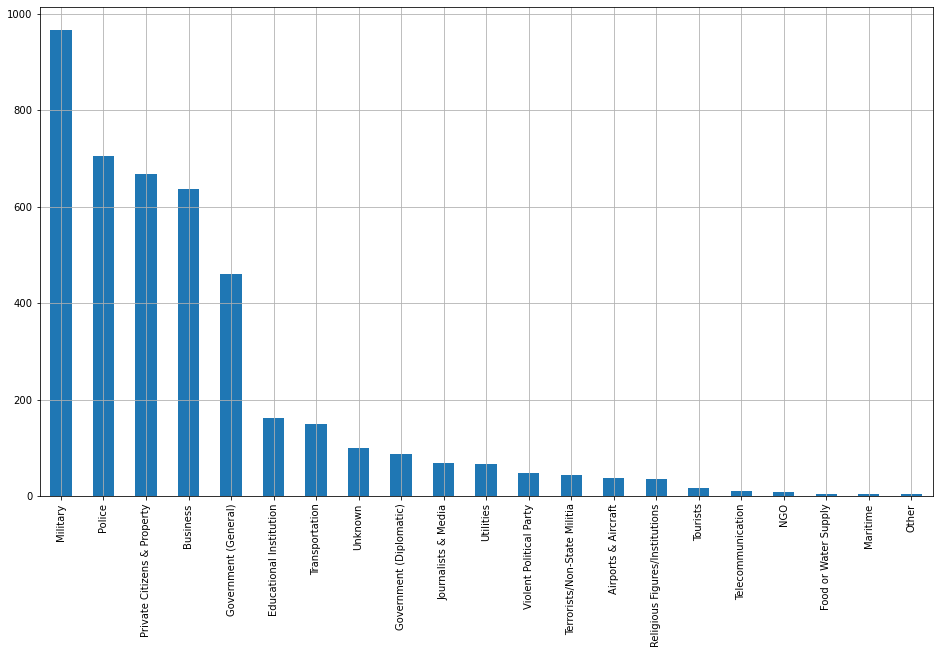

In [18]:
#terror.Target_type.hist(figsize = (50, 20))
terror.Target_type.value_counts().plot.bar(figsize=[16,9], grid=True)

<AxesSubplot:>

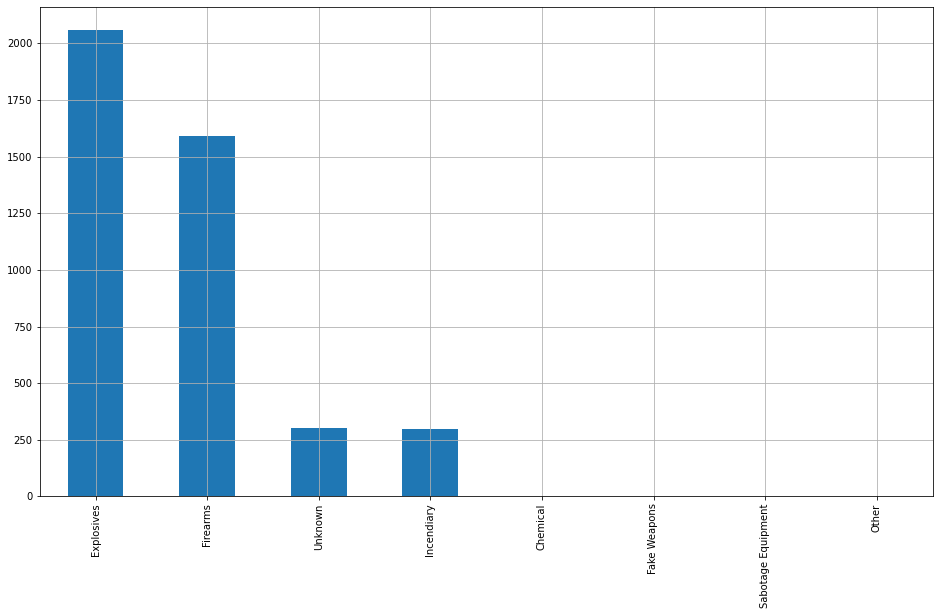

In [92]:
#terror.Weapon_type.hist(figsize = (30, 20))
terror.Weapon_type.value_counts().drop('Melee').plot.bar(figsize=[16,9], grid=True)

<AxesSubplot:>

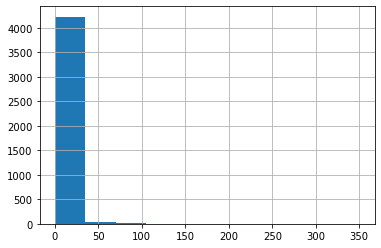

In [19]:
terror.Casualties.hist()

<AxesSubplot:xlabel='Year', ylabel='Casualties'>

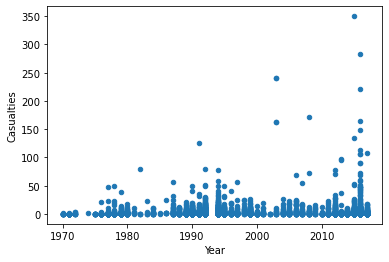

In [101]:
terror.plot.scatter(0, 14)

<AxesSubplot:xlabel='Year', ylabel='latitude'>

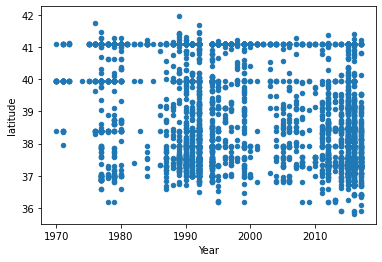

In [102]:
terror.plot.scatter(0, 5)

<AxesSubplot:xlabel='Year', ylabel='longitude'>

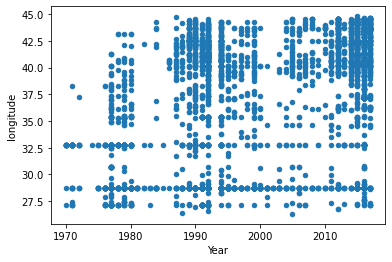

In [103]:
terror.plot.scatter(0, 6)

<AxesSubplot:xlabel='Year', ylabel='Killed'>

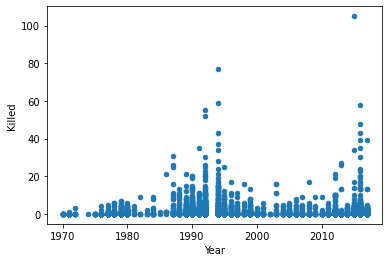

In [104]:
terror.plot.scatter(0, 8)

<AxesSubplot:xlabel='Year', ylabel='Wounded'>

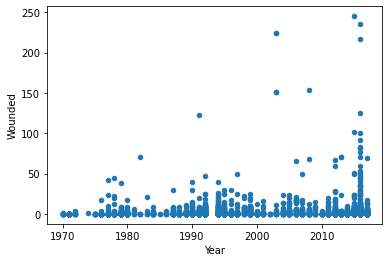

In [105]:
terror.plot.scatter(0, 9)

<AxesSubplot:xlabel='Year', ylabel='AttackType'>

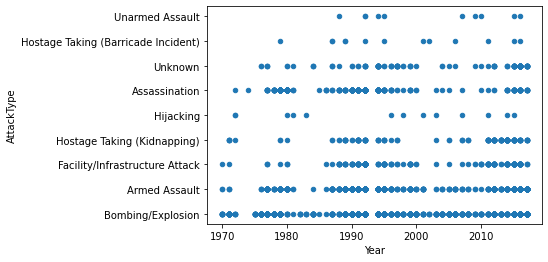

In [110]:
terror.plot.scatter(0, 7)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

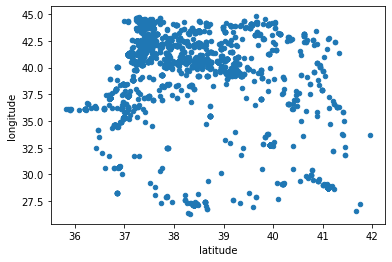

In [111]:
terror.plot.scatter(5,6)

<AxesSubplot:xlabel='latitude', ylabel='Casualties'>

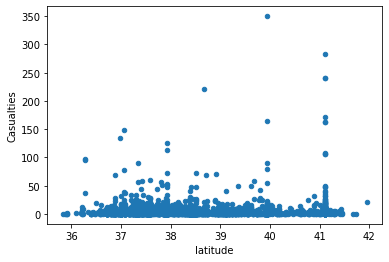

In [112]:
terror.plot.scatter(5, 14)

<AxesSubplot:xlabel='longitude', ylabel='Casualties'>

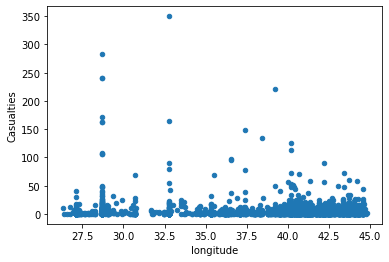

In [113]:
terror.plot.scatter(6, 14)

<AxesSubplot:xlabel='Killed', ylabel='Wounded'>

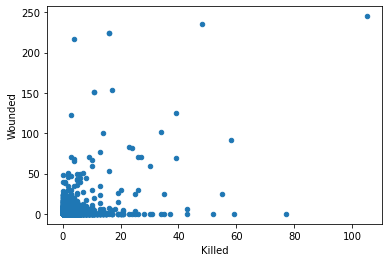

In [114]:
terror.plot.scatter(8, 9)

<AxesSubplot:xlabel='Killed', ylabel='Casualties'>

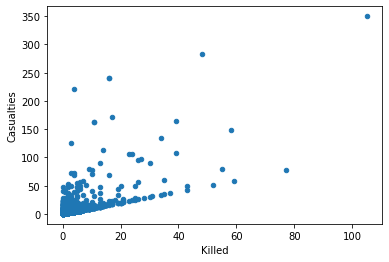

In [115]:
terror.plot.scatter(8, 14)

<AxesSubplot:xlabel='Wounded', ylabel='Casualties'>

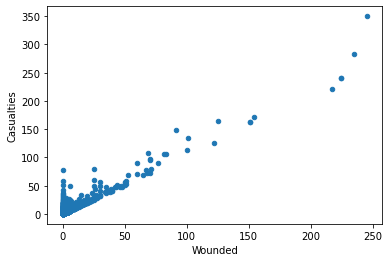

In [116]:
terror.plot.scatter(9, 14)

array([[<AxesSubplot:xlabel='Year', ylabel='Year'>,
        <AxesSubplot:xlabel='Month', ylabel='Year'>,
        <AxesSubplot:xlabel='Day', ylabel='Year'>,
        <AxesSubplot:xlabel='latitude', ylabel='Year'>,
        <AxesSubplot:xlabel='longitude', ylabel='Year'>,
        <AxesSubplot:xlabel='Killed', ylabel='Year'>,
        <AxesSubplot:xlabel='Wounded', ylabel='Year'>,
        <AxesSubplot:xlabel='Casualties', ylabel='Year'>],
       [<AxesSubplot:xlabel='Year', ylabel='Month'>,
        <AxesSubplot:xlabel='Month', ylabel='Month'>,
        <AxesSubplot:xlabel='Day', ylabel='Month'>,
        <AxesSubplot:xlabel='latitude', ylabel='Month'>,
        <AxesSubplot:xlabel='longitude', ylabel='Month'>,
        <AxesSubplot:xlabel='Killed', ylabel='Month'>,
        <AxesSubplot:xlabel='Wounded', ylabel='Month'>,
        <AxesSubplot:xlabel='Casualties', ylabel='Month'>],
       [<AxesSubplot:xlabel='Year', ylabel='Day'>,
        <AxesSubplot:xlabel='Month', ylabel='Day'>,
        <AxesSu

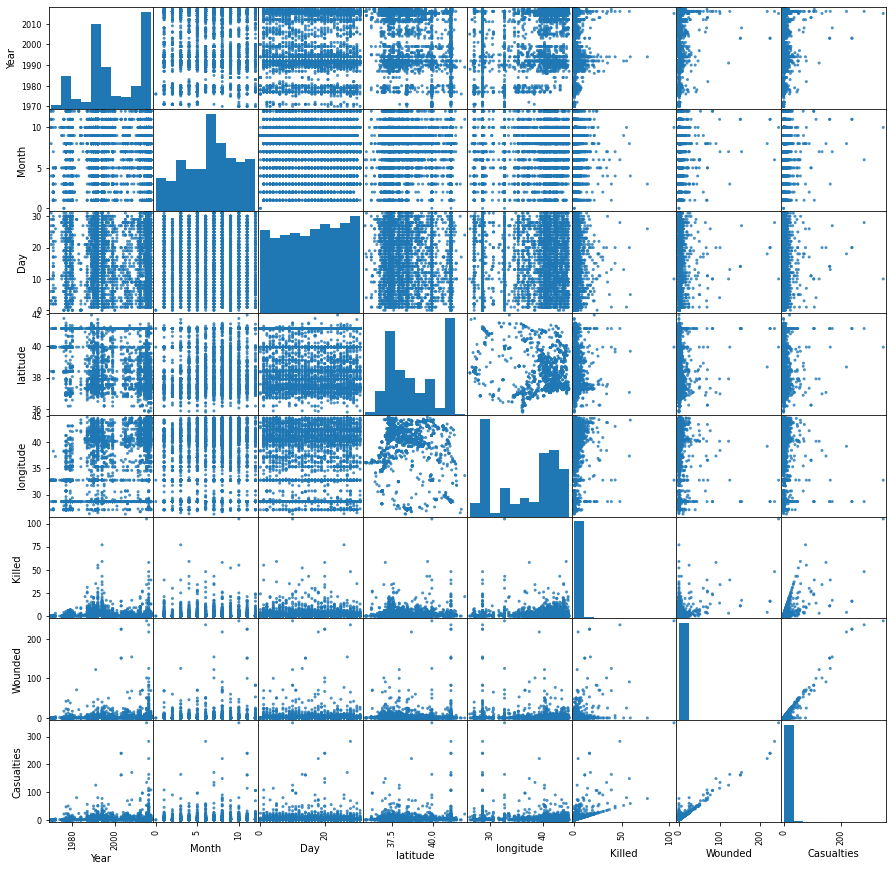

In [12]:
pd.plotting.scatter_matrix(terror, alpha=0.8, figsize = (15, 15))

C:\Users\0101\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\0101\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\0101\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\0101\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\0101\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.9% of the points cann

C:\Users\0101\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\0101\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

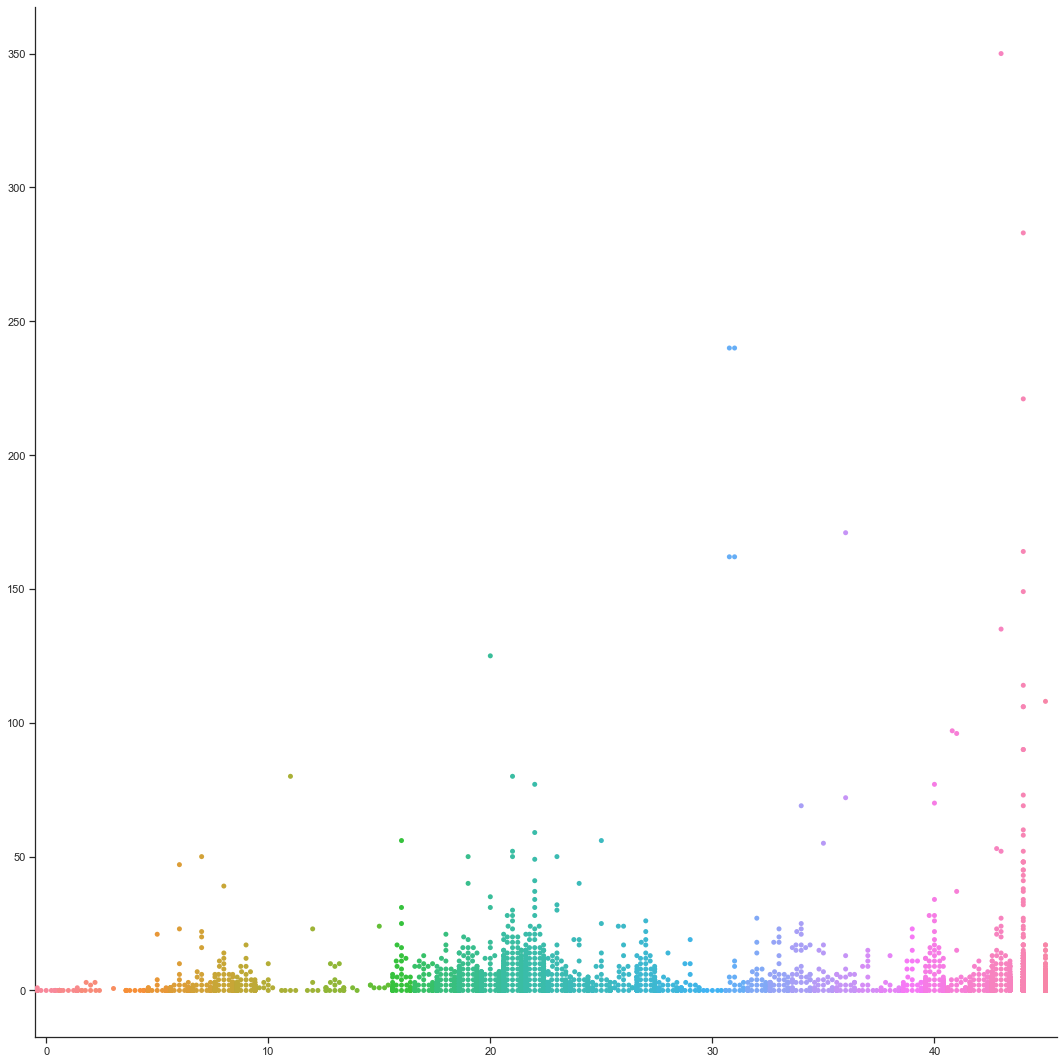

In [5]:
sns.catplot(x="Year", y="Casualties", kind="swarm", data=terror, height = 15)

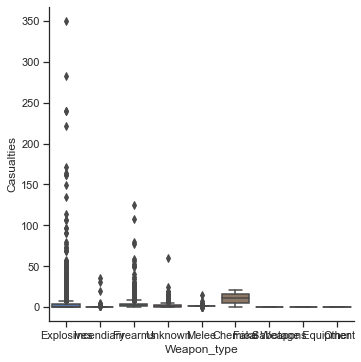

In [5]:
sns.catplot(x="Weapon_type", y="Casualties", kind="box", data=terror)
#sns.catplot(x="Weapon_type", y="Casualties", data=terror, palette ="Set2", height = 10, kind = 'box', hue = "Weapon_type")

<AxesSubplot:>

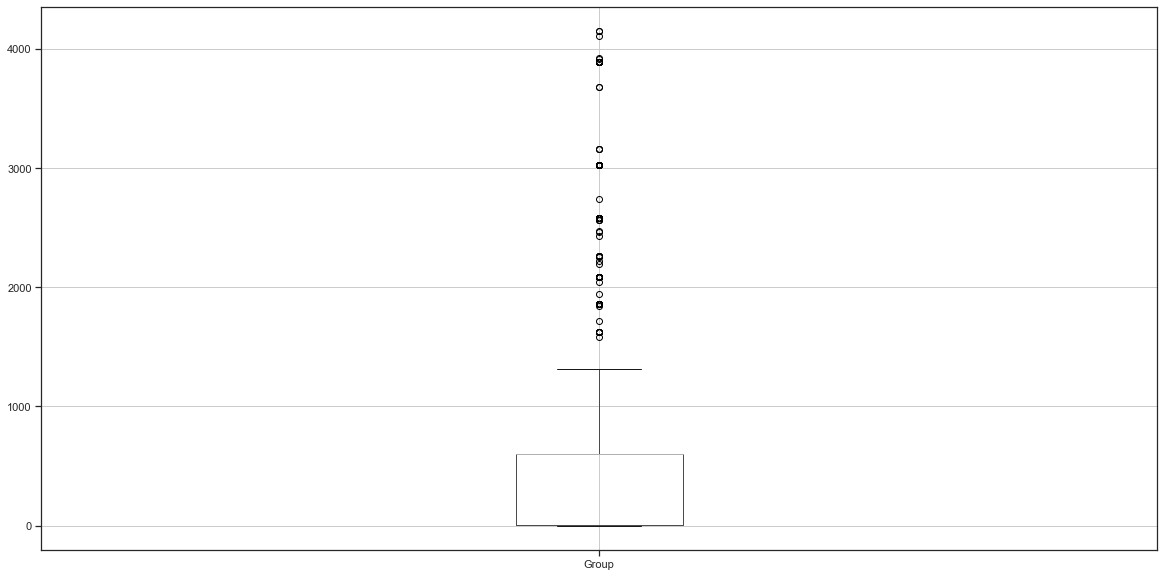

In [26]:
terror.boxplot (column = "Group", grid=True, figsize = (20, 10))
#sns.catplot(x=terror["Casualties"], y="Group", data=terror, palette ="Set2", height = 20, kind = 'box')

<AxesSubplot:xlabel='Casualties', ylabel='count'>

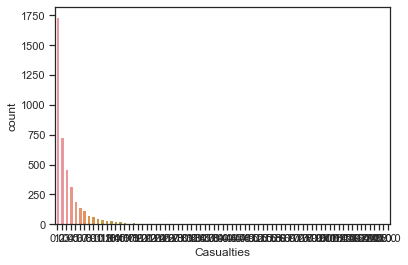

In [113]:
#sns.catplot(x=terror["Weapon_type"].value_counts(), y="Weapon_type", orient='h', kind="bar", data=terror)
sns.countplot( x = "Casualties",data=terror)

In [ ]:
terror['Year'] = terror['Year'].fillna(0)
terror['Casualties'] = terror['Casualties'].fillna(0)

terror['ratio'] = terror['Casualties'] / terror['Year'] * 100
terror.plot.hist(alpha=0.8, stacked=True)

<AxesSubplot:title={'center':'Casualties'}, xlabel='[Target]'>

C:\Users\0101\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\0101\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


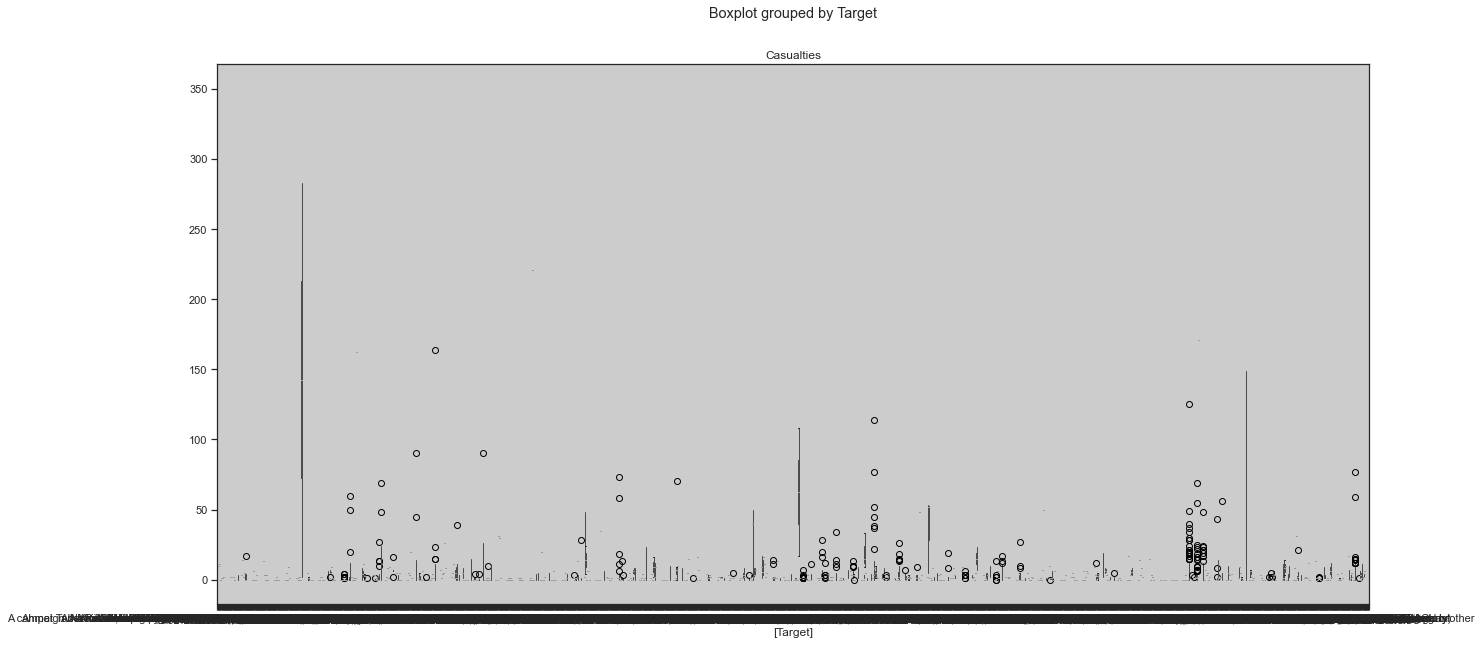

In [162]:
terror.boxplot(column = 'Casualties', by=["Target"], figsize = (20, 10))

C:\Users\0101\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)


C:\Users\0101\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


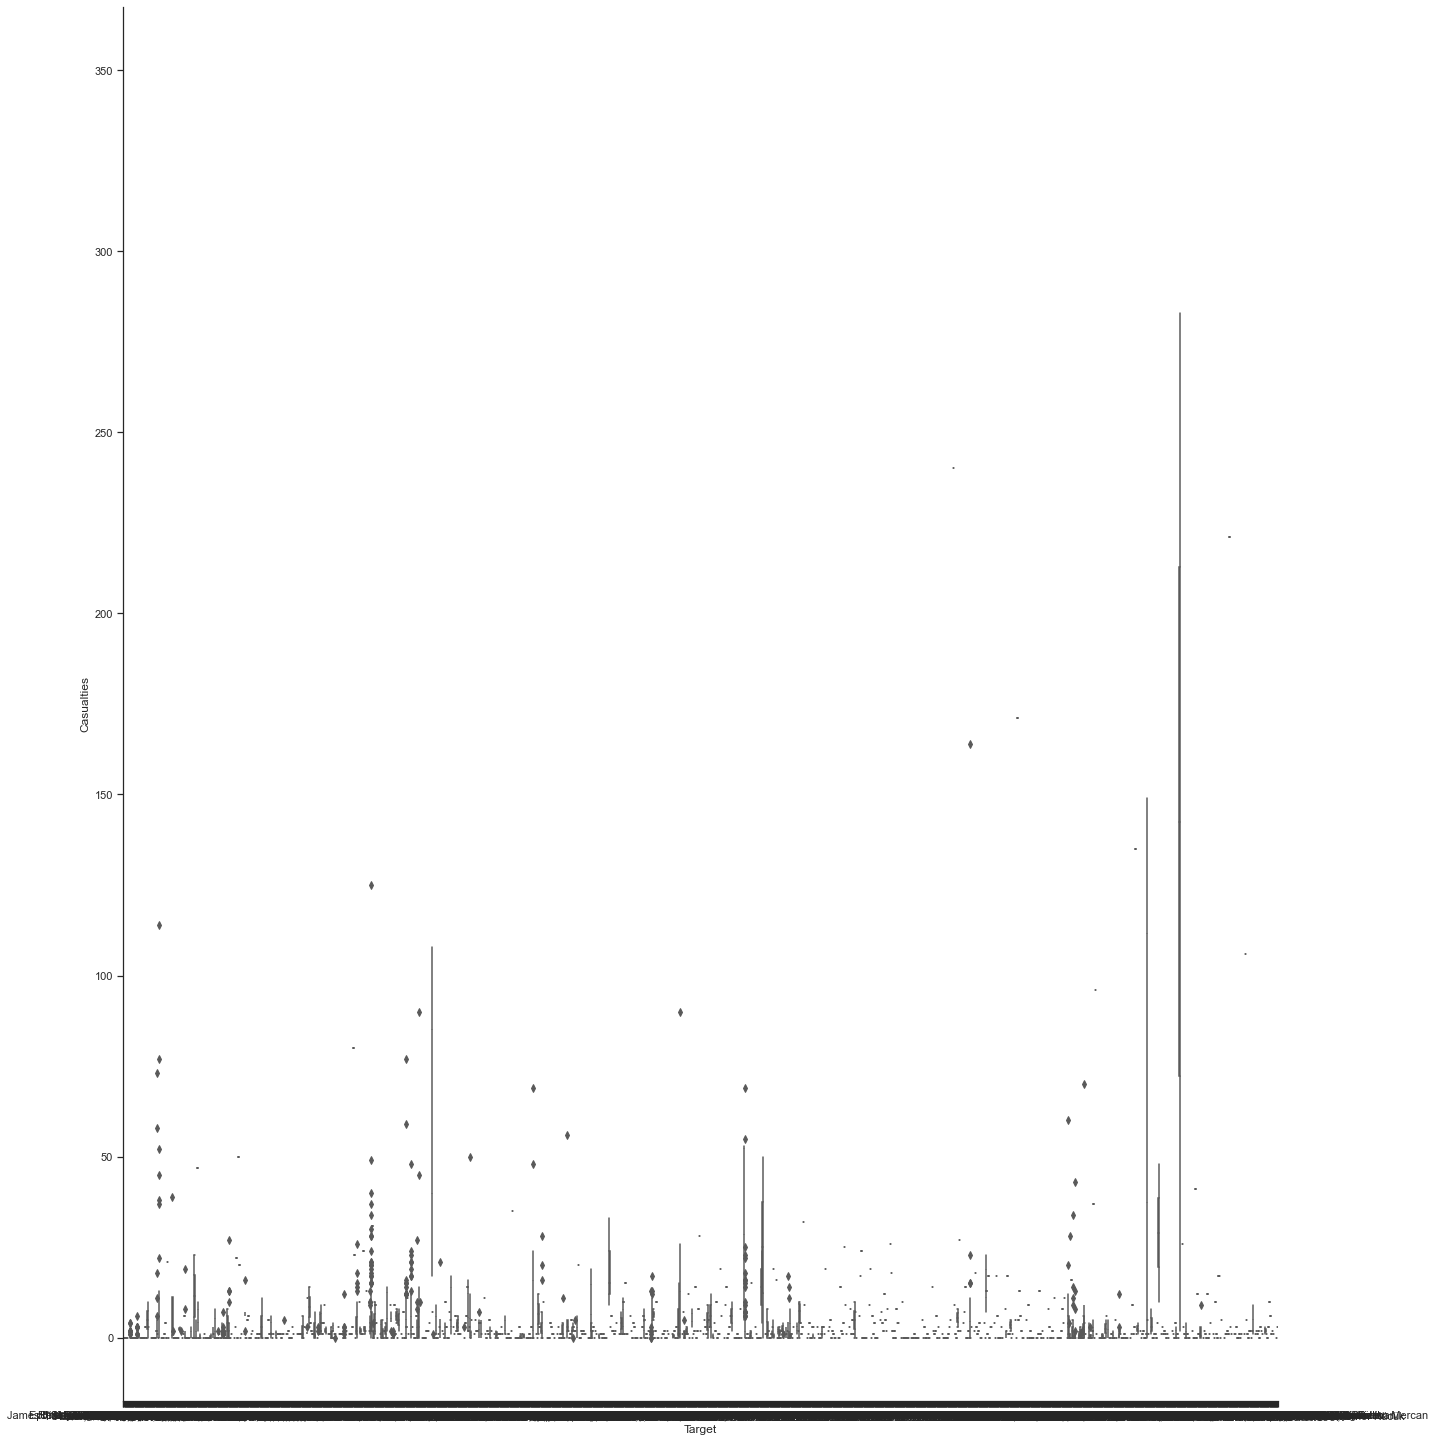

In [164]:
sns.catplot(x=terror["Target"], y="Casualties", data=terror, palette ="Set2", height = 20, kind = 'box')

In [9]:
co = terror.cov()
co

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualties
Year,182.378017,5.594952,-4.163586,-7.694888,37.148436,0.003000,15.617428,15.620428
Month,5.594952,9.635209,-1.798050,-0.517573,3.568714,0.351578,1.497824,1.849402
Day,-4.163586,-1.798050,77.294239,0.239966,-2.773638,-1.839992,-0.986218,-2.826209
latitude,-7.694888,-0.517573,0.239966,2.524825,-6.835592,-0.623148,-0.012313,-0.635461
longitude,37.148436,3.568714,-2.773638,-6.835592,36.136158,3.394409,-0.767621,2.626788
Killed,0.003000,0.351578,-1.839992,-0.623148,3.394409,18.965700,20.360901,39.326601
Wounded,15.617428,1.497824,-0.986218,-0.012313,-0.767621,20.360901,124.014007,144.374908
Casualties,15.620428,1.849402,-2.826209,-0.635461,2.626788,39.326601,144.374908,183.701510


In [8]:
crr = terror.corr()
crr

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualties
Year,1.000000,0.133469,-0.035068,-0.356535,0.454973,0.000051,0.103846,0.085340
Month,0.133469,1.000000,-0.065887,-0.105018,0.191404,0.026008,0.043331,0.043959
Day,-0.035068,-0.065887,1.000000,0.017100,-0.052245,-0.048057,-0.010073,-0.023718
latitude,-0.356535,-0.105018,0.017100,1.000000,-0.715632,-0.099564,-0.000686,-0.029417
longitude,0.454973,0.191404,-0.052245,-0.715632,1.000000,0.143357,-0.011309,0.032142
Killed,0.000051,0.026008,-0.048057,-0.099564,0.143357,1.000000,0.419834,0.666263
Wounded,0.103846,0.043331,-0.010073,-0.000686,-0.011309,0.419834,1.000000,0.956533
Casualties,0.085340,0.043959,-0.023718,-0.029417,0.032142,0.666263,0.956533,1.000000


<AxesSubplot:>

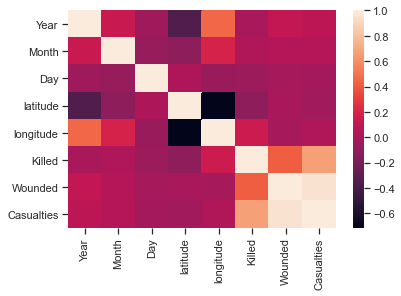

In [7]:
sns.heatmap(crr)

In [3]:
from sklearn import preprocessing
a = []

for i,j in enumerate(terror["City"].values):
    if j not in a:
        a.append(j)
        terror = terror.replace({"City" : {j : i}})
    
terror.values

#terror = terror.replace({"Country" : {"Turkey" : 0}
   #                      ""})



array([[1970, 4, 25, ..., 'Airports & Aircraft', 'Explosives', 0.0],
       [1970, 8, 31, ..., 'Military', 'Explosives', 0.0],
       [1970, 10, 2, ..., 'Military', 'Explosives', 0.0],
       ...,
       [2017, 12, 28, ..., 'Police', 'Explosives', 0.0],
       [2017, 12, 28, ..., 'Military', 'Explosives', 3.0],
       [2017, 12, 28, ..., 'Military', 'Explosives', 3.0]], dtype=object)

In [4]:
terror["City"]

226         0
486         1
531         2
534         1
535         1
         ... 
181486    598
181529    598
181607    115
181610    598
181611    598
Name: City, Length: 4292, dtype: int64

In [5]:
terror = terror.replace({"Country" : {"Turkey" : 0}})

a = []

for i,j in enumerate(terror["Weapon_type"].values):
    if j not in a:
        a.append(j)
        terror = terror.replace({"Weapon_type" : {j : i}})
a = []
for i,j in enumerate(terror["AttackType"].values):
    if j not in a:
        a.append(j)
        terror = terror.replace({"AttackType" : {j : i}})
a = []        
for i,j in enumerate(terror["Target"].values):
    if j not in a:
        a.append(j)
        terror = terror.replace({"Target" : {j : i}})
a = []        
for i,j in enumerate(terror["Group"].values):
    if j not in a:
        a.append(j)
        terror = terror.replace({"Group" : {j : i}})
a = []       
for i,j in enumerate(terror["Target_type"].values):
    if j not in a:
        a.append(j)
        terror = terror.replace({"Target_type" : {j : i}})
        
        
x = terror.values #returns a numpy array
print(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
a = pd.DataFrame(x_scaled)

#terror["City"].values


[[1.970e+03 4.000e+00 2.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.970e+03 8.000e+00 3.100e+01 ... 1.000e+00 0.000e+00 0.000e+00]
 [1.970e+03 1.000e+01 2.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [2.017e+03 1.200e+01 2.800e+01 ... 1.100e+01 0.000e+00 0.000e+00]
 [2.017e+03 1.200e+01 2.800e+01 ... 1.000e+00 0.000e+00 3.000e+00]
 [2.017e+03 1.200e+01 2.800e+01 ... 1.000e+00 0.000e+00 3.000e+00]]


In [8]:
terror

,Year,Month,Day,Country,City,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Casualties
226,1970,4,25,0,0,41.106178,28.689863,0,0.0,0.0,0,0,0,0,0.0
486,1970,8,31,0,1,39.930771,32.767540,0,0.0,0.0,1,1,1,0,0.0
531,1970,10,2,0,2,38.395649,27.135641,0,0.0,0.0,2,2,1,0,0.0
534,1970,10,3,0,1,39.930771,32.767540,0,0.0,0.0,3,3,3,0,0.0
535,1970,10,3,0,1,39.930771,32.767540,0,0.0,0.0,4,1,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181486,2017,12,23,0,598,37.332255,43.938926,5,4.0,0.0,4170,597,1,11,4.0
181529,2017,12,25,0,598,37.303442,44.576960,67,2.0,1.0,1637,597,1,25,3.0
181607,2017,12,28,0,115,36.995567,35.302888,0,0.0,0.0,764,3,11,0,0.0
181610,2017,12,28,0,598,37.293709,43.671189,0,0.0,3.0,4290,597,1,0,3.0


In [11]:
from sklearn.preprocessing import MaxAbsScaler

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(terror)

# the maximum absolute values calculated by the fit method
abs_scaler.max_abs_
# array([4.0e+05, 1.7e+01])

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(terror)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=terror.columns)

# visualize the data frame
df_scaled

,Year,Month,Day,Country,City,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Casualties
0,0.976698,0.333333,0.806452,0.0,0.000000,0.979789,0.640402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.976698,0.666667,1.000000,0.0,0.000290,0.951773,0.731422,0.000000,0.000000,0.000000,0.000233,0.000241,0.000275,0.000000,0.000000
2,0.976698,0.833333,0.064516,0.0,0.000581,0.915182,0.605709,0.000000,0.000000,0.000000,0.000466,0.000482,0.000275,0.000000,0.000000
3,0.976698,0.833333,0.096774,0.0,0.000290,0.951773,0.731422,0.000000,0.000000,0.000000,0.000699,0.000723,0.000825,0.000000,0.000000
4,0.976698,0.833333,0.096774,0.0,0.000290,0.951773,0.731422,0.000000,0.000000,0.000000,0.000932,0.000241,0.001100,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4287,1.000000,1.000000,0.741935,0.0,0.173686,0.889836,0.980785,0.007321,0.038095,0.000000,0.971801,0.143959,0.000275,0.004034,0.011429
4288,1.000000,1.000000,0.806452,0.0,0.173686,0.889149,0.995027,0.098097,0.019048,0.004082,0.381496,0.143959,0.000275,0.009168,0.008571
4289,1.000000,1.000000,0.903226,0.0,0.033401,0.881811,0.788015,0.000000,0.000000,0.000000,0.178047,0.000723,0.003026,0.000000,0.000000
4290,1.000000,1.000000,0.903226,0.0,0.173686,0.888917,0.974808,0.000000,0.000000,0.012245,0.999767,0.143959,0.000275,0.000000,0.008571


In [12]:
df_scaled.describe()

,Year,Month,Day,Country,City,latitude,longitude,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Casualties
count,4292.000000,4292.000000,4292.000000,4292.0,4292.000000,4126.000000,4126.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000
mean,0.991150,0.542385,0.517377,0.0,0.077615,0.928708,0.812723,0.019716,0.015284,0.009414,0.339172,0.118747,0.015218,0.004167,0.011175
std,0.006695,0.258672,0.283604,0.0,0.090210,0.037874,0.134182,0.064686,0.041476,0.045454,0.255795,0.149024,0.054808,0.029707,0.038725
min,0.976698,0.000000,0.000000,0.0,0.000000,0.853780,0.587132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.987110,0.333333,0.290323,0.0,0.000290,0.893397,0.640402,0.000000,0.000000,0.000000,0.144663,0.000723,0.000825,0.000000,0.000000
50%,0.989093,0.583333,0.516129,0.0,0.034563,0.917452,0.865991,0.007321,0.000000,0.000000,0.280354,0.143959,0.003026,0.001834,0.002857
75%,0.999008,0.750000,0.774194,0.0,0.161487,0.979789,0.933622,0.007321,0.009524,0.004082,0.538686,0.143959,0.006052,0.004034,0.008571
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

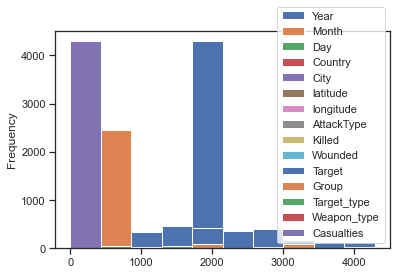

In [35]:
terror.plot.hist()